# Pose2 SLAM with g2o Files

The example below is a Pose SLAM example that reads from "g2o" files:

In [8]:
%pip -q install gtsam==4.2a5

Note: you may need to restart the kernel to use updated packages.


In [1]:
import gtsam
import matplotlib.pyplot as plt
from gtsam.utils import plot

Set some parameters:

In [2]:
maxIterations = 100

Read the file:

In [3]:
g2oFile = gtsam.findExampleDataFile("noisyToyGraph.txt")
graph, initial = gtsam.readG2o(g2oFile, is3D=False)

Add prior on the pose having index (key) = 0

In [4]:
priorModel = gtsam.noiseModel.Diagonal.Variances(
    gtsam.Point3(1e-6, 1e-6, 1e-8))
graph.add(gtsam.PriorFactorPose2(0, gtsam.Pose2(), priorModel))

Create Gauss-Newton optimizer and optimize:

In [5]:
params = gtsam.GaussNewtonParams()
params.setVerbosity("Termination")
params.setMaxIterations(maxIterations)
# parameters.setRelativeErrorTol(1e-5)
# Create the optimizer ...
optimizer = gtsam.GaussNewtonOptimizer(graph, initial, params)
# ... and optimize
result = optimizer.optimize()

print("Optimization complete")
print("initial error = ", graph.error(initial))
print("final error = ", graph.error(result))

Optimization complete
initial error =  0.3916375099488787
final error =  0.06850346649982364
errorThreshold: 0.0685035 <? 0
absoluteDecrease: -2.28853697639e-05 <? 1e-05
relativeDecrease: -0.000334187727181 <? 1e-05
iterations: 3 >? 100


In [6]:
print("\nFactor Graph:\n{}".format(graph))
print("\nInitial Estimate:\n{}".format(initial))
print("Final Result:\n{}".format(result))


Factor Graph:
NonlinearFactorGraph: size: 6

Factor 0: BetweenFactor(0,1)
  measured:  (0.774115, 1.183389, 1.576173)
  noise model: unit (3) 

Factor 1: BetweenFactor(1,2)
  measured:  (0.869231, 1.031877, 1.579418)
  noise model: unit (3) 

Factor 2: BetweenFactor(2,3)
  measured:  (1.35784, 1.034262, 1.56646)
  noise model: unit (3) 

Factor 3: BetweenFactor(2,0)
  measured:  (0.303492, 1.865011, -3.113898)
  noise model: unit (3) 

Factor 4: BetweenFactor(0,3)
  measured:  (-0.928526, 0.993695, -1.563542)
  noise model: unit (3) 

Factor 5: PriorFactor on 0
  prior mean:  (0, 0, 0)
  noise model: diagonal sigmas [0.001; 0.001; 0.0001];



Initial Estimate:
Values with 4 values:
Value 0: (gtsam::Pose2)
(0, 0, 0)

Value 1: (gtsam::Pose2)
(0.774115, 1.183389, 1.576173)

Value 2: (gtsam::Pose2)
(-0.26242, 2.047059, -3.127594)

Value 3: (gtsam::Pose2)
(-1.605649, 0.993891, -1.561134)


Final Result:
Values with 4 values:
Value 0: (gtsam::Pose2)
(-7.17032659e-23, 8.60267581e-24, 7.65142

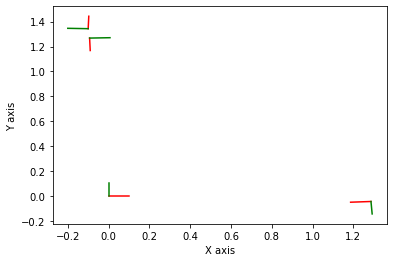

In [7]:
resultPoses = gtsam.utilities.extractPose2(result)
for i in range(resultPoses.shape[0]):
    plot.plot_pose2(1, gtsam.Pose2(resultPoses[i, :]))
plt.show()